In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
df=pd.read_csv('Churn_Modelling.csv')
df1=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df1=df1.iloc[:,3:14]
X=df.iloc[:,3:13]
y=df.iloc[:,13]
X.apply(lambda x: sum( x.isnull()),axis=0)

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

# BOXPLOTS

CreditScore


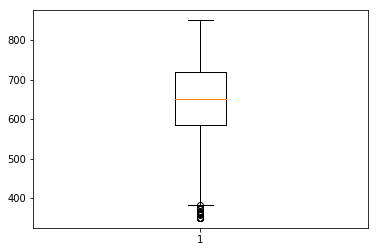

Age


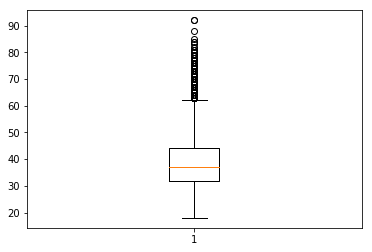

Tenure


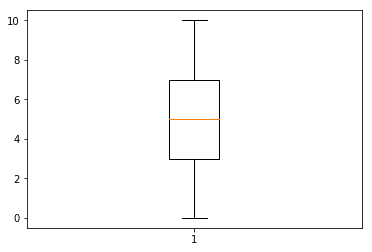

Balance


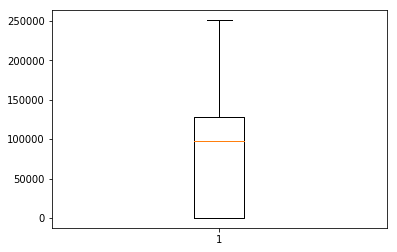

NumOfProducts


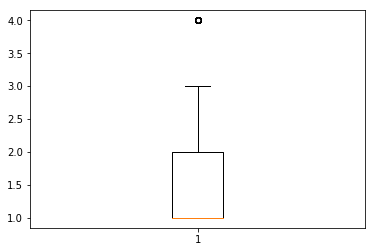

HasCrCard


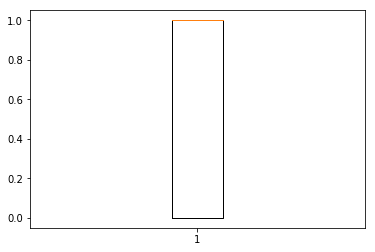

EstimatedSalary


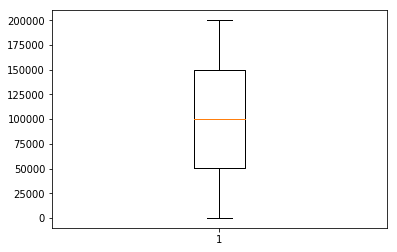

Exited


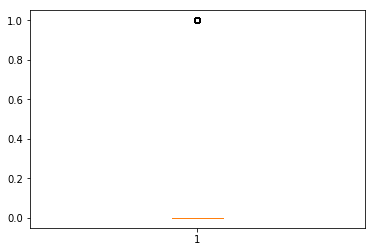

In [5]:
col_list=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'EstimatedSalary', 'Exited']
for i in col_list:   
    print(i)
    plt.boxplot(df[i])
    plt.show()

In [6]:
print("No of outliers")
for i in col_list:
    q1,q3=np.percentile(df[i],[25,75])
    iqr=q3-q1
    lb=q1-(1.5 *iqr)
    ub= q3+(1.5*iqr)
    count=0
    for j in df[i]:
        if(j <lb or j>ub):
            count+=1
    print(i,end=" : ")
    print(count)

No of outliers
CreditScore : 15
Age : 359
Tenure : 0
Balance : 0
NumOfProducts : 60
HasCrCard : 0
EstimatedSalary : 0
Exited : 2037


In [7]:
X.describe()
X['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
le = LabelEncoder()
X['Geography'] = le.fit_transform(X['Geography'])
X['Gender'] = le.fit_transform(X['Gender'])
ohe = OneHotEncoder(categorical_features=[1])
X=ohe.fit_transform(X).toarray()
X = X[:, 1:]

C:\Users\bhavana\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\bhavana\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [9]:

from sklearn.preprocessing import StandardScaler,MinMaxScaler


In [10]:
min_max_scaler= MinMaxScaler(feature_range =(0, 1)) 
X_min_max=min_max_scaler.fit_transform(X)
#Feature Extraction
m1=df1.corr(method ='pearson') 
m1['Exited']

CreditScore       -0.027094
Age                0.285323
Tenure            -0.014001
Balance            0.118533
NumOfProducts     -0.047820
HasCrCard         -0.007138
IsActiveMember    -0.156128
EstimatedSalary    0.012097
Exited             1.000000
Name: Exited, dtype: float64

# CHI SQUARE

In [11]:
from sklearn.feature_selection import chi2
m=chi2(X, y)
for  j in m[1]:
     if j<0.05:
         print('Important',j)
     else:
         print('Not Important',j)
#Splitting into train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_min_max, y, test_size = 0.2, random_state = 0)

Important 5.814571756298923e-51
Important 4.922504871444793e-06
Important 9.96353608364458e-25
Important 7.015574513879596e-13
Important 0.0
Not Important 0.07053448994496136
Important 0.0
Important 0.02454939557782345
Not Important 0.6984962089530451
Important 1.5680362405434552e-27
Important 0.0


In [12]:
m

(array([2.25464426e+02, 2.08672058e+01, 1.05403468e+02, 5.15399263e+01,
        2.30041748e+03, 3.27053797e+00, 7.15130278e+06, 5.05539429e+00,
        1.50040970e-01, 1.18199414e+02, 4.83508818e+04]),
 array([5.81457176e-51, 4.92250487e-06, 9.96353608e-25, 7.01557451e-13,
        0.00000000e+00, 7.05344899e-02, 0.00000000e+00, 2.45493956e-02,
        6.98496209e-01, 1.56803624e-27, 0.00000000e+00]))

# Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score,accuracy_score,f1_score

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
y_pred1=lr_model.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(roc_auc_score(y_test,y_pred1))
print(f1_score(y_test,y_pred1))
#0.811
#0.5968884244746313

0.813
0.5944579898602887
0.32974910394265233


C:\Users\bhavana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# NAIVE BAYES

In [14]:
bayes_model=GaussianNB()
bayes_model.fit(X_train,y_train)
y_pred2=bayes_model.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(roc_auc_score(y_test,y_pred2))
print(f1_score(y_test,y_pred2))

0.8295
0.6674368203103835
0.4841149773071104


# SVM

In [15]:
svc_model = SVC(gamma='auto')
svc_model.fit(X_train,y_train) 
y_pred3=svc_model.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(roc_auc_score(y_test,y_pred3))
print(f1_score(y_test,y_pred3))

0.7975
0.5
0.0


C:\Users\bhavana\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


# KNN

In [16]:
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
y_pred4=knn_model.predict(X_test)
print(accuracy_score(y_test,y_pred4))
print(roc_auc_score(y_test,y_pred4))
print(f1_score(y_test,y_pred4))

0.7995
0.6477069546035064
0.4422809457579972


# Visualization:

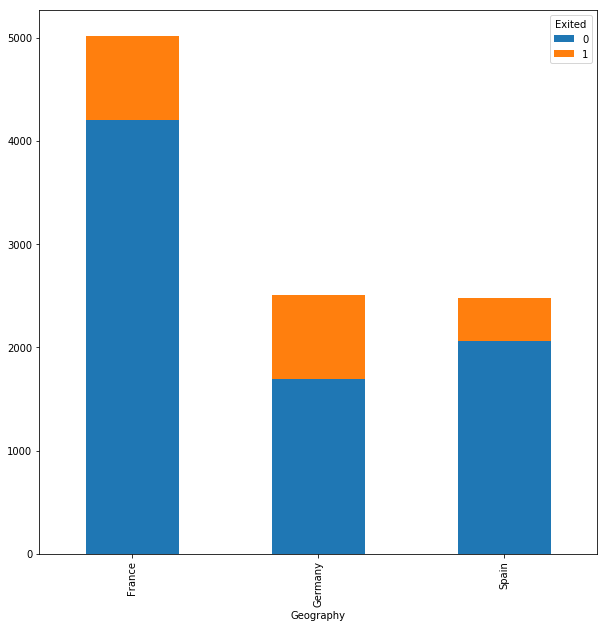

In [17]:
df.groupby(["Geography", "Exited"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,10))

In [18]:
Xfrance=df["Geography"]=='France'
Xspain=df["Geography"]=='Spain'
Xgermany=df["Geography"]=='Germany'

In [19]:
france=df[Xfrance]
spain=df[Xspain]
germany=df[Xgermany]
df_new=df
bins4=[17,30,40,100]

In [20]:
france['Age1']=pd.cut(france['Age'],bins4)
spain['Age1']=pd.cut(spain['Age'],bins4)
germany['Age1']=pd.cut(germany['Age'],bins4)


C:\Users\bhavana\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\bhavana\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\bhavana\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

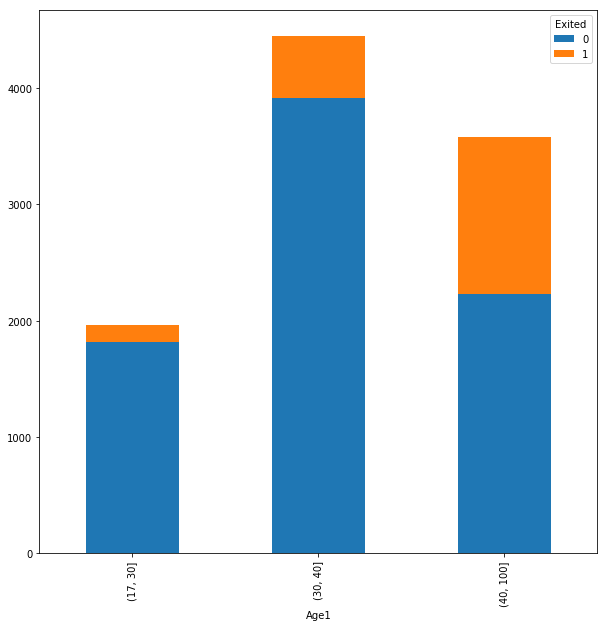

In [21]:
df_new['Age1']=pd.cut(df['Age'],bins4)
df_new.groupby(["Age1", "Exited"]).size().unstack().plot(kind='bar', stacked=True,figsize=(10,10))


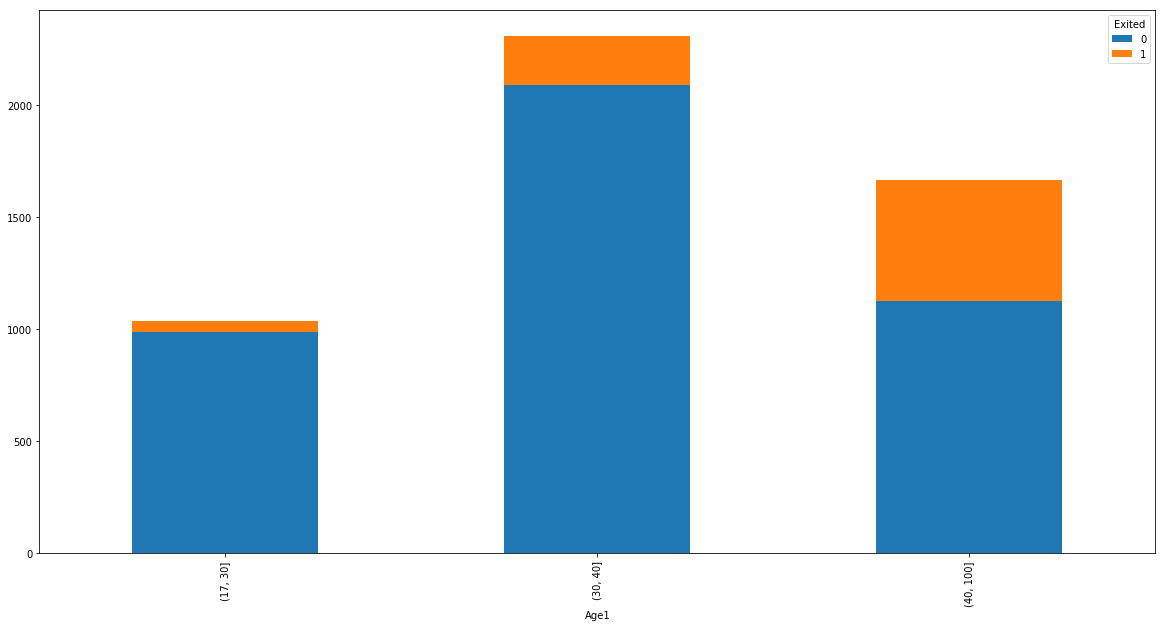

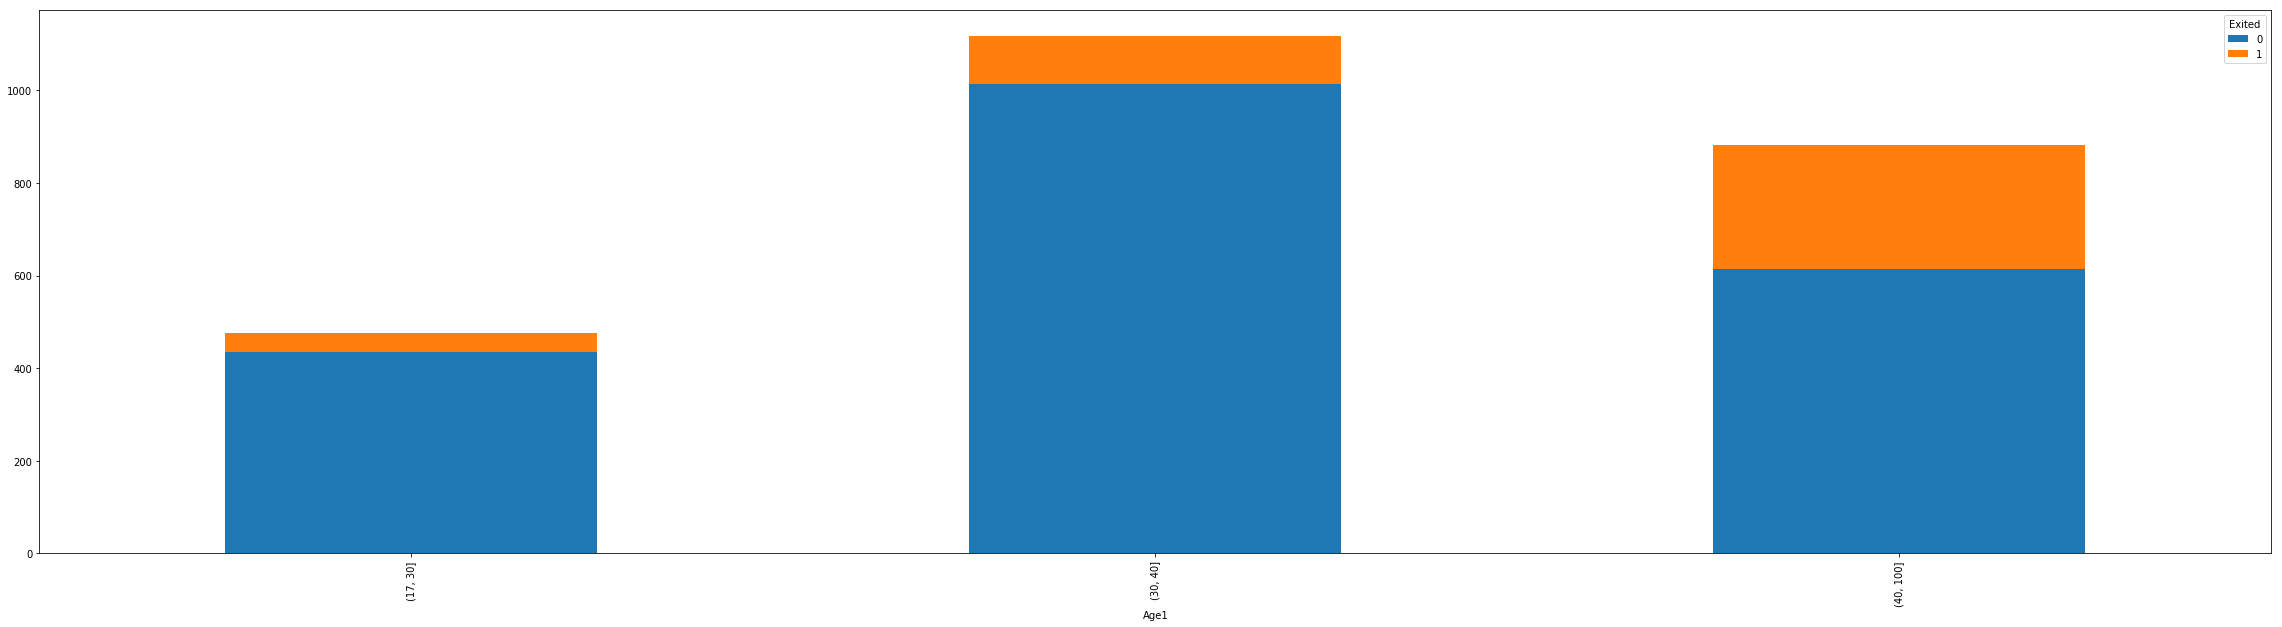

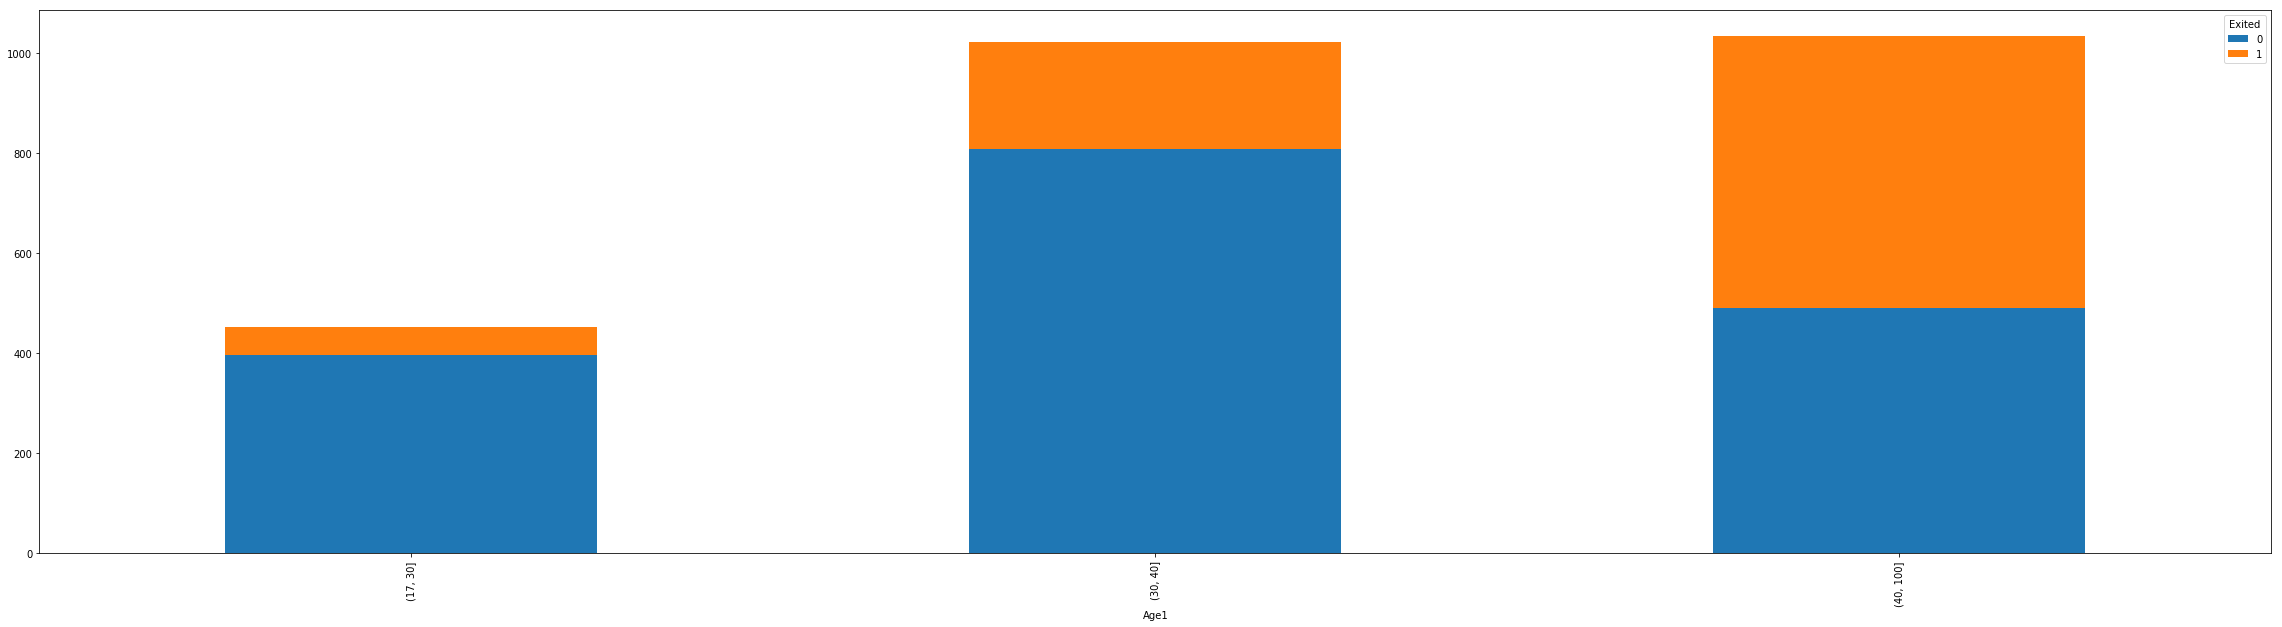

In [22]:
france.groupby(["Age1", "Exited"]).size().unstack().plot(kind='bar', stacked=True,figsize=(20,10))
spain.groupby(["Age1", "Exited"]).size().unstack().plot(kind='bar', stacked=True, figsize=(40,10))
germany.groupby(["Age1", "Exited"]).size().unstack().plot(kind='bar', stacked=True, figsize=(40,10))